In [37]:
"""Import Statements:
"""
#base
import re
import string
import pandas as pd
import numpy as np 
import pandas as pd 
from collections import Counter


# Plotting
import squarify
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

# NLP Libraries
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

import spacy
nlp = spacy.load("en_core_web_lg")

def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    

In [97]:
df = pd.read_csv('./data/medcab.csv')

In [98]:
df.head(3)

,Unnamed: 0,Strain,Type,Rating,Effects,Flavor,Description,Ammonia_flavor,Apple_flavor,Apricot_flavor,...,Hungry_effect,Relaxed_effect,Sleepy_effect,Talkative_effect,Tingly_effect,Uplifted_effect,None_effect,hybrid_type,sativa_type,indica_type
0,0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,2,1024,sativa,4.4,"Uplifted, Happy, Relaxed, Energetic, Creative","Spicy/Herbal, Sage, Woody",1024 is a sativa-dominant hybrid bred in Spain...,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [99]:
df.dtypes

Unnamed: 0              int64
Strain                 object
Type                   object
Rating                float64
Effects                object
Flavor                 object
Description            object
Ammonia_flavor         object
Apple_flavor           object
Apricot_flavor         object
Berry_flavor           object
Blue_flavor            object
Blueberry_flavor       object
Citrus_flavor          object
Cheese_flavor          object
Chemical_flavor        object
Chestnut_flavor        object
Diesel_flavor          object
Earthy_flavor          object
Flowery_flavor         object
Fruit_flavor           object
Grape_flavor           object
Grapefruit_flavor      object
Honey_flavor           object
Lavender_flavor        object
Lemon_flavor           object
Mango_flavor           object
Menthol_flavor         object
Mint_flavor            object
Minty_flavor           object
                       ...   
Pungent_flavor         object
Sage_flavor            object
Skunk_flav

In [100]:
df.drop(['Unnamed: 0'], axis=1)

,Strain,Type,Rating,Effects,Flavor,Description,Ammonia_flavor,Apple_flavor,Apricot_flavor,Berry_flavor,...,Hungry_effect,Relaxed_effect,Sleepy_effect,Talkative_effect,Tingly_effect,Uplifted_effect,None_effect,hybrid_type,sativa_type,indica_type
0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,1024,sativa,4.4,"Uplifted, Happy, Relaxed, Energetic, Creative","Spicy/Herbal, Sage, Woody",1024 is a sativa-dominant hybrid bred in Spain...,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
3,13-Dawgs,hybrid,4.2,"Tingly, Creative, Hungry, Relaxed, Uplifted","Apricot, Citrus, Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,False,False,True,False,...,True,True,False,False,True,True,False,True,False,False
4,24K-Gold,hybrid,4.6,"Happy, Relaxed, Euphoric, Uplifted, Talkative","Citrus, Earthy, Orange",Also known as Kosher Tangie 24k Gold is a 60%...,False,False,False,False,...,False,True,False,True,False,True,False,True,False,False
5,3-Bears-Og,indica,0.0,None,None,3 Bears OG by Mephisto Genetics is an autoflow...,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
6,3-Kings,hybrid,4.4,"Relaxed, Euphoric, Happy, Uplifted, Hungry","Earthy, Sweet, Pungent",The 3 Kings marijuana strain a holy trinity o...,False,False,False,False,...,True,True,False,False,False,True,False,True,False,False
7,303-Og,indica,4.2,"Relaxed, Happy, Euphoric, Uplifted, Giggly","Citrus, Pungent, Earthy",The indica-dominant 303 OG is a Colorado strai...,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
8,3D-Cbd,sativa,4.6,"Uplifted, Focused, Happy, Talkative, Relaxed","Earthy, Woody, Flowery",3D CBD from Snoop Dogg’s branded line of canna...,False,False,False,False,...,False,True,False,True,False,True,False,False,True,False
9,3X-Crazy,indica,4.4,"Relaxed, Tingly, Happy, Euphoric, Uplifted","Earthy, Grape, Sweet",Also known as Optimus Prime the indica-domina...,False,False,False,False,...,False,True,False,False,True,True,False,False,False,True


### Text Features: 

In [101]:
df['Savor'] = ', ' + df['Flavor'].astype(str)

In [102]:
df['Style'] = ', ' + df['Description'].astype(str)

In [103]:
df['Breed'] = ', ' + df['Strain'].astype(str)

In [104]:
df['Text'] = df['Effects'].map(str) + df['Savor']

In [105]:
df['Text'] = df['Text'].map(str) + df['Style']

In [106]:
df['Text'] = df['Text'].map(str) + df['Breed']

In [107]:
df['Text'] = df['Text'].map(str) + df['Style']

In [108]:
df['Effects_and_Flavor'] = df['Effects'].map(str) + df['Savor']

In [109]:
df.head(3)

,Unnamed: 0,Strain,Type,Rating,Effects,Flavor,Description,Ammonia_flavor,Apple_flavor,Apricot_flavor,...,Uplifted_effect,None_effect,hybrid_type,sativa_type,indica_type,Savor,Style,Breed,Text,Effects_and_Flavor
0,0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,False,False,False,...,False,False,True,False,False,", Earthy, Sweet, Citrus",", $100 OG is a 50/50 hybrid strain that packs ...",", 100-Og","Creative, Energetic, Tingly, Euphoric, Relaxed...","Creative, Energetic, Tingly, Euphoric, Relaxed..."
1,1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,False,False,False,...,False,False,True,False,False,", Flowery, Violet, Diesel",", The ‘98 Aloha White Widow is an especially p...",", 98-White-Widow","Relaxed, Aroused, Creative, Happy, Energetic, ...","Relaxed, Aroused, Creative, Happy, Energetic, ..."
2,2,1024,sativa,4.4,"Uplifted, Happy, Relaxed, Energetic, Creative","Spicy/Herbal, Sage, Woody",1024 is a sativa-dominant hybrid bred in Spain...,False,False,False,...,True,False,False,True,False,", Spicy/Herbal, Sage, Woody",", 1024 is a sativa-dominant hybrid bred in Spa...",", 1024","Uplifted, Happy, Relaxed, Energetic, Creative,...","Uplifted, Happy, Relaxed, Energetic, Creative,..."


In [140]:
df = df.reset_index()

In [141]:
df['ID'] = df['Strain'].index
df['ID'] = df['ID'].astype(int)

In [142]:
df['ID'].isna().sum()

0

In [143]:
np.random.seed(42)

In [144]:
df.shape

(2350, 75)

In [145]:
df['index'].nunique(), df['ID'].nunique()

(2350, 2350)

In [146]:
df['Text']= df['Text'].str.replace(',', ' ')

## Vectorizing our Text:

In [147]:
df.head(2)

,level_0,index,Unnamed: 0,Strain,Type,Rating,Effects,Flavor,Description,Ammonia_flavor,...,hybrid_type,sativa_type,indica_type,Savor,Style,Breed,Text,Effects_and_Flavor,ID,tokens
0,0,0,0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,False,...,True,False,False,", Earthy, Sweet, Citrus",", $100 OG is a 50/50 hybrid strain that packs ...",", 100-Og",Creative Energetic Tingly Euphoric Relaxed...,"Creative, Energetic, Tingly, Euphoric, Relaxed...",0,"[creative, , energetic, , tingly, , euphori..."
1,1,1,1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,False,...,True,False,False,", Flowery, Violet, Diesel",", The ‘98 Aloha White Widow is an especially p...",", 98-White-Widow",Relaxed Aroused Creative Happy Energetic ...,"Relaxed, Aroused, Creative, Happy, Energetic, ...",1,"[relaxed, , aroused, , creative, , happy, ..."


In [149]:
df.drop(['Unnamed: 0', 'level_0'], axis=1)

,index,Strain,Type,Rating,Effects,Flavor,Description,Ammonia_flavor,Apple_flavor,Apricot_flavor,...,hybrid_type,sativa_type,indica_type,Savor,Style,Breed,Text,Effects_and_Flavor,ID,tokens
0,0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,False,False,False,...,True,False,False,", Earthy, Sweet, Citrus",", $100 OG is a 50/50 hybrid strain that packs ...",", 100-Og",Creative Energetic Tingly Euphoric Relaxed...,"Creative, Energetic, Tingly, Euphoric, Relaxed...",0,"[creative, , energetic, , tingly, , euphori..."
1,1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,False,False,False,...,True,False,False,", Flowery, Violet, Diesel",", The ‘98 Aloha White Widow is an especially p...",", 98-White-Widow",Relaxed Aroused Creative Happy Energetic ...,"Relaxed, Aroused, Creative, Happy, Energetic, ...",1,"[relaxed, , aroused, , creative, , happy, ..."
2,2,1024,sativa,4.4,"Uplifted, Happy, Relaxed, Energetic, Creative","Spicy/Herbal, Sage, Woody",1024 is a sativa-dominant hybrid bred in Spain...,False,False,False,...,False,True,False,", Spicy/Herbal, Sage, Woody",", 1024 is a sativa-dominant hybrid bred in Spa...",", 1024",Uplifted Happy Relaxed Energetic Creative ...,"Uplifted, Happy, Relaxed, Energetic, Creative,...",2,"[uplifted, , happy, , relaxed, , energetic,..."
3,3,13-Dawgs,hybrid,4.2,"Tingly, Creative, Hungry, Relaxed, Uplifted","Apricot, Citrus, Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,False,False,True,...,True,False,False,", Apricot, Citrus, Grapefruit",", 13 Dawgs is a hybrid of G13 and Chemdawg gen...",", 13-Dawgs",Tingly Creative Hungry Relaxed Uplifted A...,"Tingly, Creative, Hungry, Relaxed, Uplifted, A...",3,"[tingly, , creative, , hungry, , relaxed, ..."
4,4,24K-Gold,hybrid,4.6,"Happy, Relaxed, Euphoric, Uplifted, Talkative","Citrus, Earthy, Orange",Also known as Kosher Tangie 24k Gold is a 60%...,False,False,False,...,True,False,False,", Citrus, Earthy, Orange",", Also known as Kosher Tangie 24k Gold is a 6...",", 24K-Gold",Happy Relaxed Euphoric Uplifted Talkative ...,"Happy, Relaxed, Euphoric, Uplifted, Talkative,...",4,"[happy, , relaxed, , euphoric, , uplifted, ..."
5,5,3-Bears-Og,indica,0.0,None,None,3 Bears OG by Mephisto Genetics is an autoflow...,False,False,False,...,False,False,True,", None",", 3 Bears OG by Mephisto Genetics is an autofl...",", 3-Bears-Og",None None 3 Bears OG by Mephisto Genetics is...,"None, None",5,"[ , , 3, bears, og, mephisto, genetics, autof..."
6,6,3-Kings,hybrid,4.4,"Relaxed, Euphoric, Happy, Uplifted, Hungry","Earthy, Sweet, Pungent",The 3 Kings marijuana strain a holy trinity o...,False,False,False,...,True,False,False,", Earthy, Sweet, Pungent",", The 3 Kings marijuana strain a holy trinity...",", 3-Kings",Relaxed Euphoric Happy Uplifted Hungry Ea...,"Relaxed, Euphoric, Happy, Uplifted, Hungry, Ea...",6,"[relaxed, , euphoric, , happy, , uplifted, ..."
7,7,303-Og,indica,4.2,"Relaxed, Happy, Euphoric, Uplifted, Giggly","Citrus, Pungent, Earthy",The indica-dominant 303 OG is a Colorado strai...,False,False,False,...,False,False,True,", Citrus, Pungent, Earthy",", The indica-dominant 303 OG is a Colorado str...",", 303-Og",Relaxed Happy Euphoric Uplifted Giggly Ci...,"Relaxed, Happy, Euphoric, Uplifted, Giggly, Ci...",7,"[relaxed, , happy, , euphoric, , uplifted, ..."
8,8,3D-Cbd,sativa,4.6,"Uplifted, Focused, Happy, Talkative, Relaxed","Earthy, Woody, Flowery",3D CBD from Snoop Dogg’s branded line of canna...,False,False,False,...,False,True,False,", Earthy, Woody, Flowery",", 3D CBD from Snoop Dogg’s branded line of can...",", 3D-Cbd",Uplifted Focused Happy Talkative Relaxed ...,"Uplifted, Focused, Happy, Talkative, Relaxed, ...",8,"[uplifted, , focused, , happy, , talkative,..."
9,9,3X-Crazy,indica,4.4,"Relaxed, Tingly, Happy, Euphoric, Uplifted","Earthy, Grape, Sweet",Al

In [121]:
# possible analysis functions

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [122]:
#Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [124]:
#Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['Text'], batch_size=100):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [125]:
# Using the "Count" function
wc = count(df['tokens'])

In [129]:
wc = count(df['tokens'])
wc.head(3)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
67,,2350,39608,1.0,0.097077,0.097077,1.000000
11,and,2231,14650,2.0,0.035906,0.132984,0.949362
31,a,2187,12238,3.0,0.029995,0.162978,0.930638


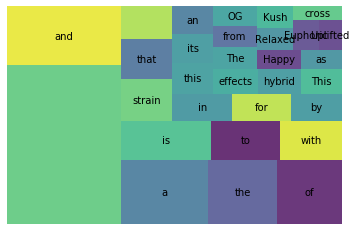

In [130]:
wc_top20 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [131]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[(' ', 39608),
 ('and', 14650),
 ('a', 12238),
 ('the', 9642),
 ('of', 9130),
 ('is', 7700),
 ('to', 5902),
 ('with', 5336),
 ('strain', 4672),
 ('that', 4536)]

In [132]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['Text'], batch_size=100):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [133]:
wc = count(df['tokens'])

In [134]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
45,,2350,39608,1.0,0.143795,0.143795,1.000000
9,strain,1598,4680,2.0,0.016991,0.160786,0.680000
71,,1153,3631,3.0,0.013182,0.173968,0.490638
46,sweet,1379,2650,4.0,0.009621,0.183589,0.586809
164,effects,1035,2430,5.0,0.008822,0.192411,0.440426


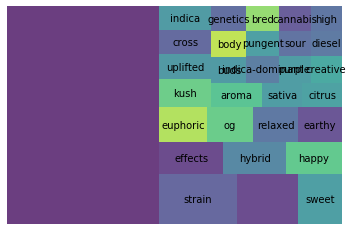

In [135]:
wc_top20 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
plt.axis('off')
plt.show()

In [136]:
wc.head(25)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
45,,2350,39608,1.0,0.143795,0.143795,1.000000
9,strain,1598,4680,2.0,0.016991,0.160786,0.680000
71,,1153,3631,3.0,0.013182,0.173968,0.490638
46,sweet,1379,2650,4.0,0.009621,0.183589,0.586809
164,effects,1035,2430,5.0,0.008822,0.192411,0.440426
38,hybrid,1028,2362,6.0,0.008575,0.200986,0.437447
53,happy,1891,2118,7.0,0.007689,0.208675,0.804681
17,euphoric,1679,1998,8.0,0.007254,0.215929,0.714468
8,og,466,1944,9.0,0.007058,0.222987,0.198298
29,relaxed,1735,1859,10.0,0.006749,0.229736,0.738298


In [137]:
wc.tail(25)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14009,wild-thailand,1,1,14140.0,0.000004,0.999913,0.000426
14012,willie-nelson,1,1,14141.0,0.000004,0.999916,0.000426
14015,willy-wonka,1,1,14142.0,0.000004,0.999920,0.000426
14016,willys-wonder,1,1,14143.0,0.000004,0.999924,0.000426
14019,wonder-haze,1,1,14144.0,0.000004,0.999927,0.000426
14022,wonder-kid,1,1,14145.0,0.000004,0.999931,0.000426
14031,wonder-woman,1,1,14146.0,0.000004,0.999935,0.000426
14035,wonderwoman-og,1,1,14147.0,0.000004,0.999938,0.000426
14039,wonka-s-bubbilicious,1,1,14148.0,0.000004,0.999942,0.000426
14042,woody-kush,1,1,14149.0,0.000004,0.999946,0.000426


In [138]:
# Spacy's Default stop words:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [139]:
wc = count(df['tokens'])
wc.head(50)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
45,,2350,39608,1.0,0.143795,0.143795,1.000000
9,strain,1598,4680,2.0,0.016991,0.160786,0.680000
71,,1153,3631,3.0,0.013182,0.173968,0.490638
46,sweet,1379,2650,4.0,0.009621,0.183589,0.586809
164,effects,1035,2430,5.0,0.008822,0.192411,0.440426
38,hybrid,1028,2362,6.0,0.008575,0.200986,0.437447
53,happy,1891,2118,7.0,0.007689,0.208675,0.804681
17,euphoric,1679,1998,8.0,0.007254,0.215929,0.714468
8,og,466,1944,9.0,0.007058,0.222987,0.198298
29,relaxed,1735,1859,10.0,0.006749,0.229736,0.738298


In [158]:
# Removing all words that may overlap with our flavor and effects columns:
STOP_WORDS = nlp.Defaults.stop_words.union(['strain',
                                            'effects',
                                            'effects,',
                                            'buds',
                                            'known',
                                            'genetics',
                                            'bred',
                                            '',
                                            ' ',
                                            'like',
                                            'notes',
                                            'flavors',
                                            'patients'
                                            ])

In [161]:
tokens = []

""" tokens w/o updated stopwords"""
for doc in tokenizer.pipe(df['Text'], batch_size=100):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [164]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
66,,1153,3631,1.0,0.016300,0.016300,0.490638
43,sweet,1379,2650,2.0,0.011896,0.028196,0.586809
36,hybrid,1028,2362,3.0,0.010603,0.038799,0.437447
50,happy,1891,2118,4.0,0.009508,0.048307,0.804681
16,euphoric,1679,1998,5.0,0.008969,0.057276,0.714468


In [165]:
df.columns

Index(['index', 'Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description',
       'Ammonia_flavor', 'Apple_flavor', 'Apricot_flavor', 'Berry_flavor',
       'Blue_flavor', 'Blueberry_flavor', 'Citrus_flavor', 'Cheese_flavor',
       'Chemical_flavor', 'Chestnut_flavor', 'Diesel_flavor', 'Earthy_flavor',
       'Flowery_flavor', 'Fruit_flavor', 'Grape_flavor', 'Grapefruit_flavor',
       'Honey_flavor', 'Lavender_flavor', 'Lemon_flavor', 'Mango_flavor',
       'Menthol_flavor', 'Mint_flavor', 'Minty_flavor', 'Nutty_flavor',
       'Orange_flavor', 'Peach_flavor', 'Pepper_flavor', 'Pine_flavor',
       'Pineapple_flavor', 'Pungent_flavor', 'Sage_flavor', 'Skunk_flavor',
       'SpicyHerbal_flavor', 'Strawberry', 'Sweet_flavor', 'Tea_flavor',
       'Tobacco_flavor', 'Tree_flavor', 'Tropical_flavor', 'Vanilla_flavor',
       'Violet_flavor', 'Woody_flavor', 'Aroused_effect', 'Creative_effect',
       'Energetic_effect', 'Euphoric_effect', 'Focused_effect',
       'Giggly_effect', 'Ha

In [167]:
# new .csv file

df.to_csv(r'./data/medcab1_2.csv')